In [3]:
install.packages('survminer')

also installing the dependencies ‘markdown’, ‘png’, ‘jpeg’, ‘xml2’, ‘exactRankTests’, ‘mvtnorm’, ‘KMsurv’, ‘zoo’, ‘km.ci’, ‘xtable’, ‘gridtext’, ‘maxstat’, ‘survMisc’, ‘ggtext’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [68]:
library(help=survminer)

In [4]:
library(survminer)

Loading required package: ggplot2

Loading required package: ggpubr



In [5]:
require("survival")

Loading required package: survival



In [6]:
head(lung)

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3,306,2,74,1,1,90,100,1175,NA
2,3,455,2,68,1,0,90,90,1225,15
3,3,1010,1,56,1,0,90,90,NA,15
4,5,210,2,57,1,1,90,60,1150,11
5,1,883,2,60,1,0,100,90,NA,0
6,12,1022,1,74,1,1,50,80,513,0


In [7]:
dim(lung)

[1] 228  10

In [95]:
fit <- survfit(Surv(time, status) ~ sex, data = lung)

In [96]:
?Surv

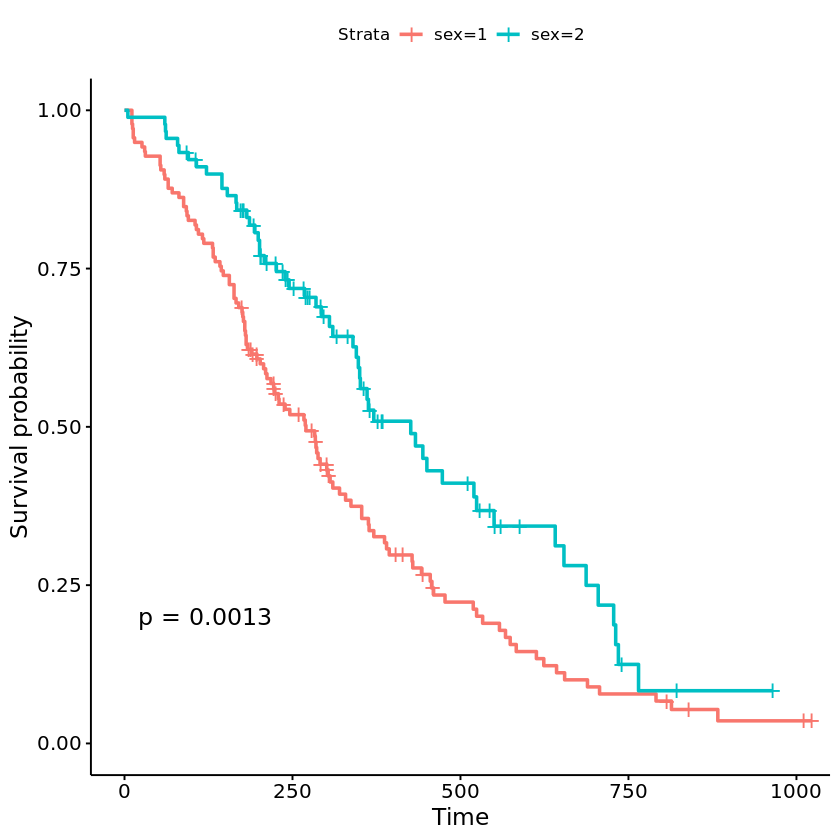

In [97]:
ggsurvplot(fit, data = lung, pval=TRUE)

## CCP data

The [Kaplan-Meier](http://www.sthda.com/english/wiki/survival-analysis-basics) (KM) method is a non-parametric method used to estimate the survival probability from observed survival times (Kaplan and Meier, 1958).

The survival probability at time ti, S(ti), is calculated as follow:

$S_{(t_i)}=S_{(t_{i−1})}(1−\frac{d_i}{n_i})$

Where,

S(ti−1) = the probability of being alive at ti−1

ni = the number of patients alive just before ti

di = the number of events at ti

t0 = 0, S(0) = 1

The estimated probability (S(t)) is a step function that changes value only at the time of each event. It’s also possible to compute confidence intervals for the survival probability.

The KM survival curve, a plot of the KM survival probability against time, provides a useful summary of the data that can be used to estimate measures such as median survival time.



In [10]:
fit

Call: survfit(formula = Surv(time, status) ~ sex, data = lung)

        n events median 0.95LCL 0.95UCL
sex=1 138    112    270     212     310
sex=2  90     53    426     348     550

In [26]:
?read.delim

In [81]:
ccp <- read.delim('sobrevivencia_ccp.tsv', check.names=FALSE, dec = ",")

In [13]:
dim(ccp)

[1] 15 16

In [14]:
table(ccp$Sexo)


 F  M 
 2 13 

In [15]:
# (idade, linfonodo positivo, quimioterapia, radioterapia, classificação T, e metástase) 

In [16]:
table(ccp[,'Linfonodo positivo'])


           Não Sem informação            Sim              X 
             3              1             10              1 

In [17]:
table(ccp[,'Quimioterapia'])


Não Sim 
 11   4 

In [18]:
table(ccp[,'Radioterapia'])


Não Sim 
  3  12 

In [19]:
table(ccp[,'Metástase'])


Não Sim 
 14   1 

In [20]:
table(ccp[,'Idade'])


41 46 49 52 53 54 55 59 60 69 70 76 
 1  1  1  1  2  1  1  3  1  1  1  1 

In [21]:
sum(ccp[,'Idade']>55)

[1] 7

In [37]:
table(ccp[,'Classificação T (tamanho do turmor)'])


             1              3              4 Sem informação              X 
             2              5              5              1              2 

In [22]:
table(ccp[,c('Metástase', 'Observação óbito')])

         Observação óbito
Metástase não Não sim Sim
      Não   3   2   2   7
      Sim   0   0   1   0

In [23]:
table(ccp[,c('Quimioterapia', 'Observação óbito')])

             Observação óbito
Quimioterapia não Não sim Sim
          Não   2   2   1   6
          Sim   1   0   2   1

In [87]:
ccp$status <- 0

grep('sim|Sim', ccp[,'Observação óbito'])

[1]  1  2  5  6  7  8  9 12 14 15

In [88]:
ccp[grep('sim|Sim', ccp[,'Observação óbito']), 'status'] <- 1

In [86]:
ccp$time <- ccp[, 'Período de observação (meses)']

In [38]:
fit_chemo <- survfit(Surv(time, status) ~ Quimioterapia, data = ccp)

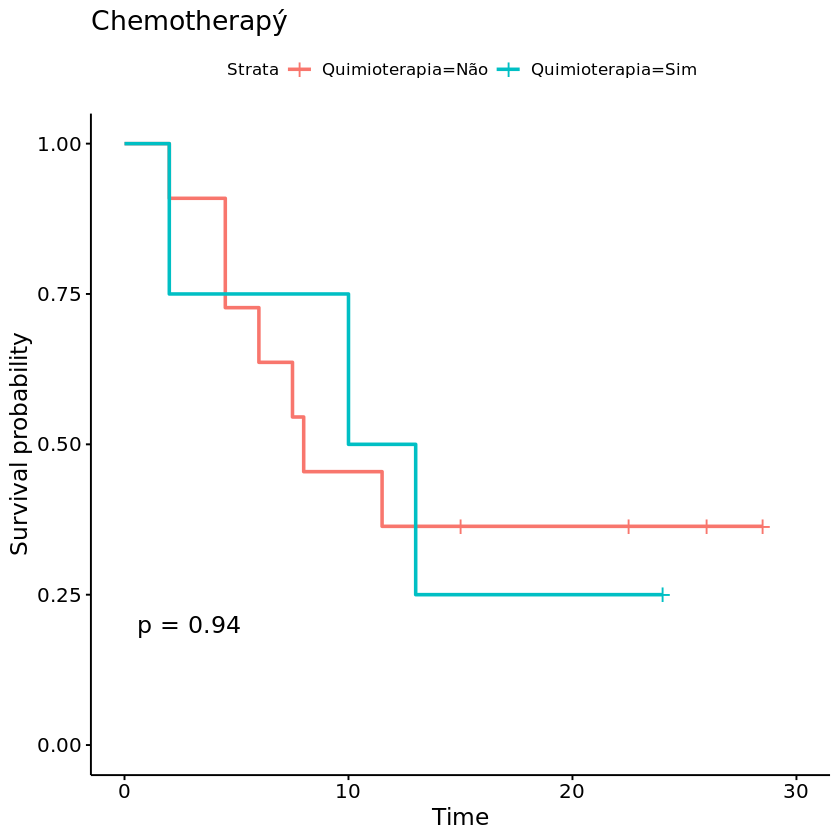

In [93]:
ggsurvplot(fit_chemo, data = ccp, title='Chemotherapy', pval=TRUE)

In [89]:
ccp$age <- '>=55'

In [90]:
ccp[ccp[,'Idade']<55, 'age'] <- '<55'

In [91]:
fit_age <- survfit(Surv(time, status) ~ age, data = ccp)

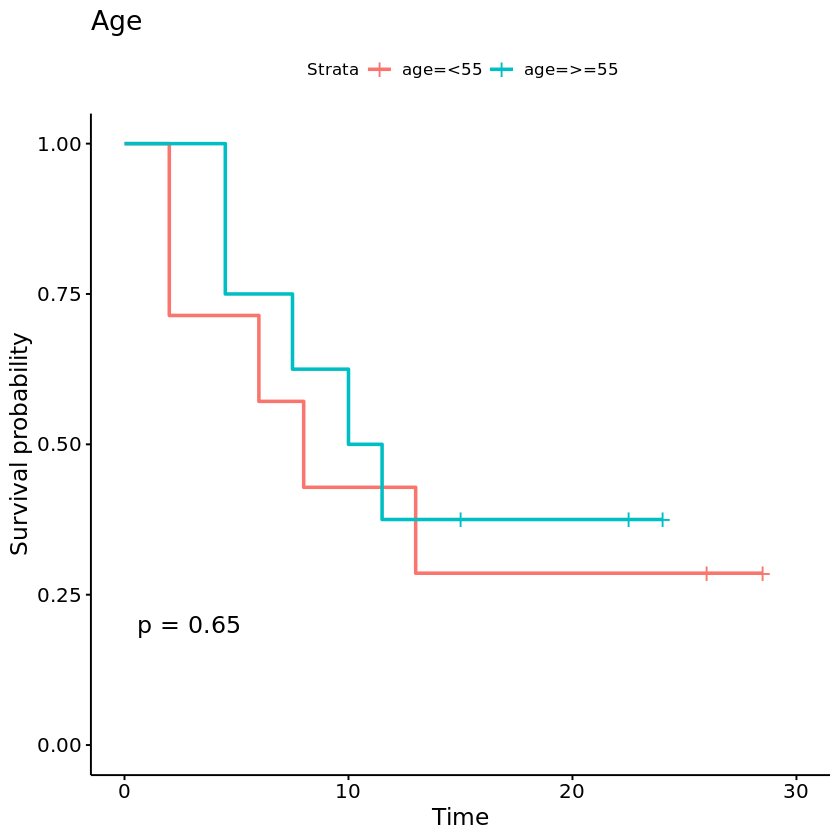

In [92]:
ggsurvplot(fit_age, data = ccp, title='Age', pval=TRUE)

In [44]:
ccp[ccp[,'Idade']<55, 'Idade']

[1] 41 53 52 53 46 49 54

In [45]:
ccp[,'Classificação T (tamanho do turmor)']

[1] 3              4              3              4              1             
 [6] 4              1              4              X              4             
[11] Sem informação 3              3              X              3             
Levels: 1 3 4 Sem informação X

In [47]:
as.numeric(ccp[,'Classificação T (tamanho do turmor)'])>4

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE
[13] FALSE  TRUE FALSE

In [57]:
as.numeric(as.character(ccp[,'Classificação T (tamanho do turmor)']))

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


[1]  3  4  3  4  1  4  1  4 NA  4 NA  3  3 NA  3

In [56]:
ccp[,'Classificação T (tamanho do turmor)']

[1] 3              4              3              4              1             
 [6] 4              1              4              X              4             
[11] Sem informação 3              3              X              3             
Levels: 1 3 4 Sem informação X

In [58]:
num <- as.numeric(as.character(ccp[,'Classificação T (tamanho do turmor)']))

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [60]:
num < 4

[1]  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE    NA FALSE    NA  TRUE
[13]  TRUE    NA  TRUE

In [99]:
ccp$tumor <- '>=4'

ccp[num<4 & !is.na(num), 'tumor'] <- '<4'

ccp[,c('tumor', 'Classificação T (tamanho do turmor)')]

tumor,Classificação T (tamanho do turmor)
<chr>,<fct>
<4,3
>=4,4
<4,3
>=4,4
<4,1
>=4,4
<4,1
>=4,4
>=4,X


In [100]:
ccp[!grepl('X|S', ccp[,'Classificação T (tamanho do turmor)']),c('tumor', 'Classificação T (tamanho do turmor)')]

,tumor,Classificação T (tamanho do turmor)
,<chr>,<fct>
1,<4,3
2,>=4,4
3,<4,3
4,>=4,4
5,<4,1
6,>=4,4
7,<4,1
8,>=4,4
10,>=4,4


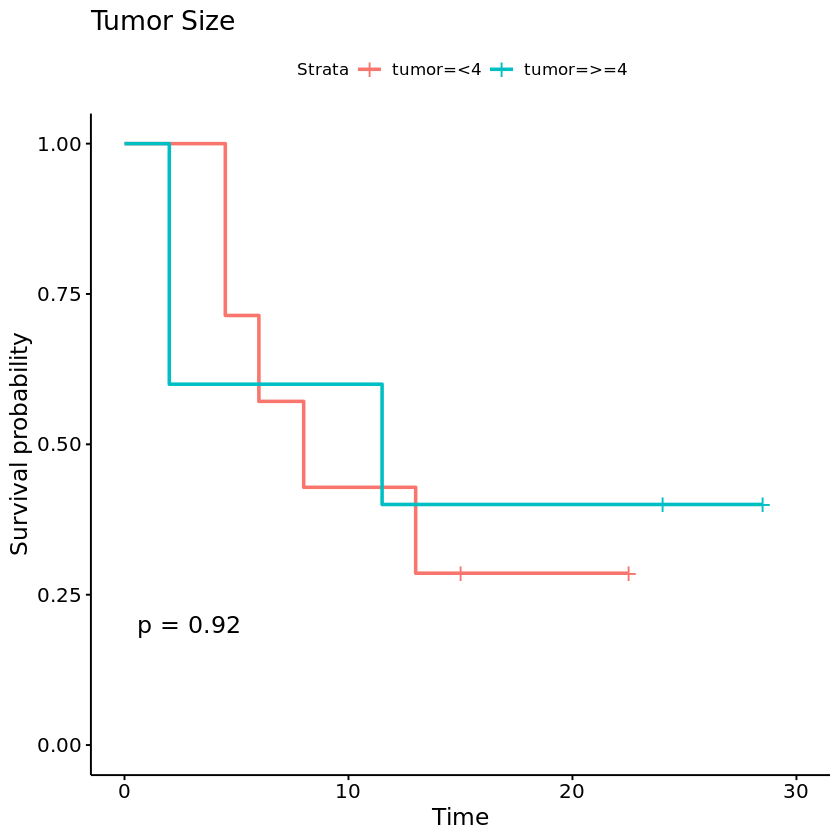

In [76]:
fit_tumor <- survfit(Surv(time, status) ~ tumor, 
                     data = ccp[!grepl('X|S', ccp[,'Classificação T (tamanho do turmor)']),])

ggsurvplot(fit_tumor, data = ccp[!grepl('X|S', ccp[,'Classificação T (tamanho do turmor)']),], 
           title='Tumor Size', pval=TRUE)

In [67]:
summary(fit_tumor)

Call: survfit(formula = Surv(time, status) ~ tumor, data = ccp[!grepl("X|S", 
    ccp[, "Classificação T (tamanho do turmor)"]), ])

                tumor=<4 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
  4.5      7       2    0.714   0.171       0.4471        1.000
  6.0      5       1    0.571   0.187       0.3008        1.000
  8.0      4       1    0.429   0.187       0.1822        1.000
 13.0      3       1    0.286   0.171       0.0886        0.922

                tumor=>=4 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
  2.0      5       2      0.6   0.219        0.293            1
 11.5      3       1      0.4   0.219        0.137            1


In [79]:
#http://r-addict.com/2017/02/09/Fancy-Survival-Plots.html
?surv_pvalue

In [70]:
fit.null <- surv_fit(Surv(time, status) ~ 1, data = ccp)

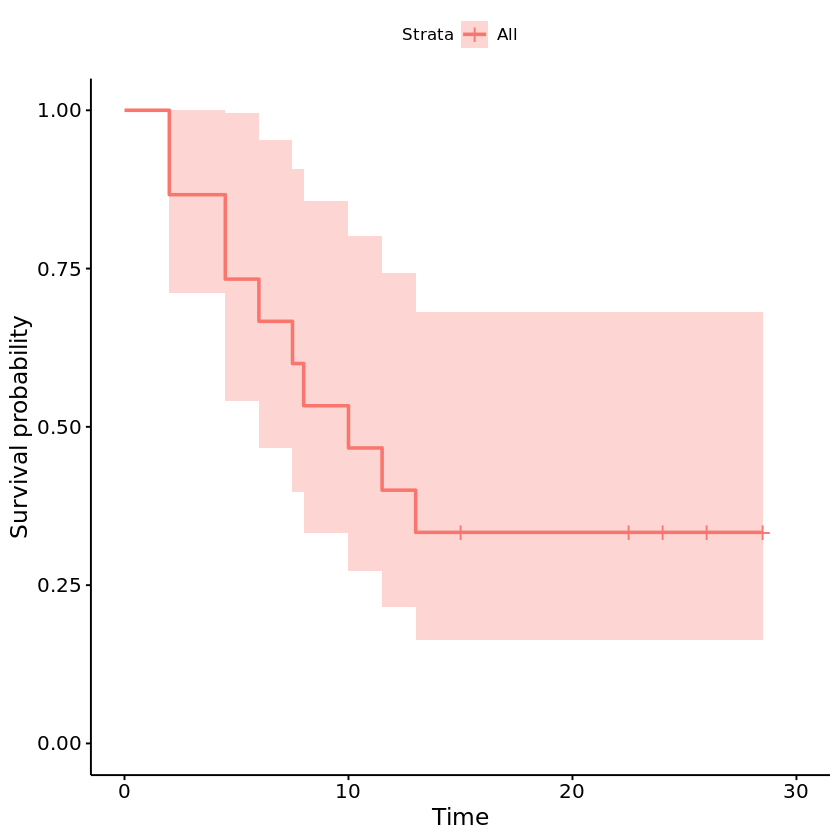

In [72]:
ggsurvplot(fit.null, data = ccp)

In [75]:
?ggsurvplot

In [77]:
surv_pvalue(fit_tumor)

variable,pval,method,pval.txt
<chr>,<dbl>,<chr>,<chr>
tumor,0.9183723,Log-rank,p = 0.92


In [104]:
dev.off()

pdf 
  3

In [105]:
pdf('ccp_survival_curves.pdf')
ggsurvplot(fit_chemo, data = ccp, title='Chemotherapy', pval=TRUE)
ggsurvplot(fit_age, data = ccp, title='Age', pval=TRUE)
ggsurvplot(fit_tumor, data = ccp[!grepl('X|S', ccp[,'Classificação T (tamanho do turmor)']),], 
           title='Tumor Size', pval=TRUE)
dev.off()

png 
  2

## CG data

In [146]:
cg <- read.delim('sobrevivencia_cg.tsv', check.names=FALSE, dec = ",")

In [149]:
table(cg[, 'Período de observação (meses)'])


             1            1,5             12           13,5              2 
             3              1              1              1              2 
            23             24             29              3              5 
             2              1              1              1              1 
             6            8,5 Sem informação 
             1              1              3 

In [150]:
cg <- cg[!grepl('Sem', cg[,'Período de observação (meses)']),]

cg[,'Período de observação (meses)'] <- as.numeric(sub(',', '.', cg[,'Período de observação (meses)']))

In [151]:
cg[,'Período de observação (meses)']

[1]  6.0 12.0 29.0  8.5  1.0  2.0  1.0 13.5  2.0  1.0 23.0  3.0 24.0 23.0  5.0
[16]  1.5

In [152]:
dim(cg)

[1] 16 16

In [153]:
table(cg[,'Linfonodo positivo'])


           Não Sem informação            Sim              X 
             6              0              8              2 

In [154]:
table(cg[,'Observação óbito'])


           não            Não Sem informação            sim            Sim 
             1              2              0              2             11 

In [155]:
cg[grep('Sem', cg[,'Observação óbito']),]

Registro HC,Sexo,Idade,Diagnóstico,Linfonodo positivo,Quimioterapia,Radioterapia,Classificação T (tamanho do turmor),Metástase,TNM,Estágio do câncer,Observação óbito,Data do óbito,Data de último contato,Data de início da observação,Período de observação (meses)
<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>


In [156]:
cg <- cg[!grepl('Sem', cg[,'Observação óbito']),]
table(cg[,'Observação óbito'])


           não            Não Sem informação            sim            Sim 
             1              2              0              2             11 

In [157]:
cg$status <- 0

grep('sim|Sim', cg[,'Observação óbito'])

[1]  1  2  4  5  6  7  8  9 10 12 14 15 16

In [158]:
cg[grep('sim|Sim', cg[,'Observação óbito']), 'status'] <- 1

table(cg$status)


 0  1 
 3 13 

In [159]:
cg$lymphnode <- cg[,'Linfonodo positivo']

In [160]:
cg[cg[,'Linfonodo positivo']=='sim', 'lymphnode'] <- 'Sim'
cg[cg[,'Linfonodo positivo']=='não', 'lymphnode'] <- 'Não'

table(cg$lymphnode)


           Não Sem informação            Sim              X 
             6              0              8              2 

In [161]:
cg[!grepl('Sem|X', cg[,'Linfonodo positivo']), 'lymphnode']

[1] Não Não Não Sim Sim Não Sim Não Sim Não Sim Sim Sim Sim
Levels: Não Sem informação Sim X

In [162]:
cg$time <- cg[, 'Período de observação (meses)']

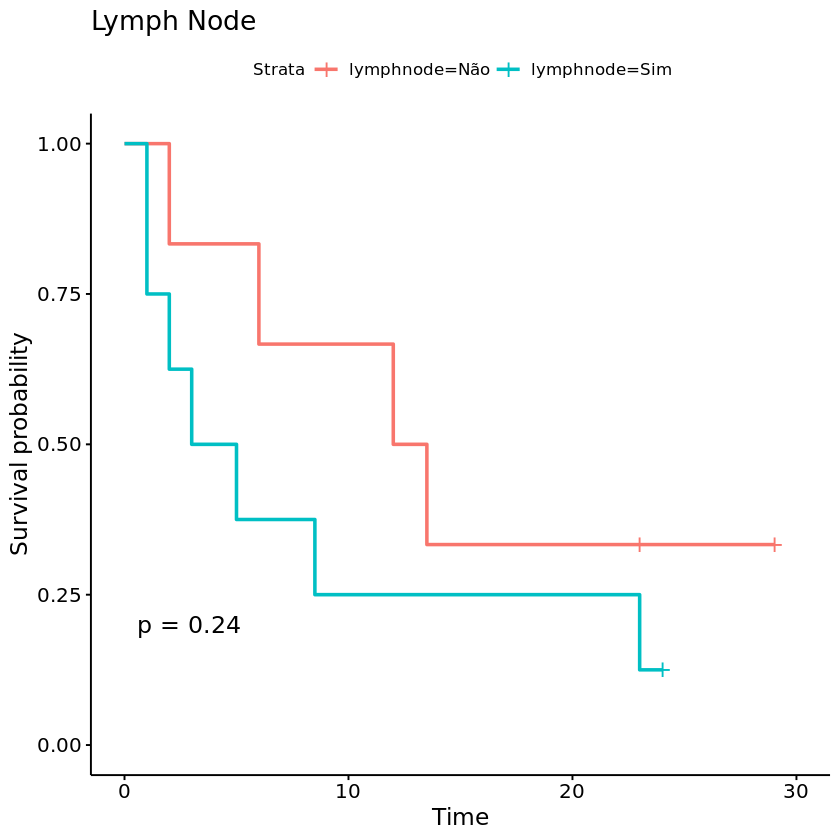

In [163]:
fit_lymph <- survfit(Surv(time, status) ~ lymphnode, data = cg[!grepl('Sem|X', cg[,'Linfonodo positivo']),])
ggsurvplot(fit_lymph, data = cg[!grepl('Sem|X', cg[,'Linfonodo positivo']),], title='Lymph Node', pval=TRUE)

In [164]:
table(cg[,'Quimioterapia'])


           Não Sem informação            Sim 
             9              0              7 

In [166]:
cg$chemo <- cg[,'Quimioterapia']

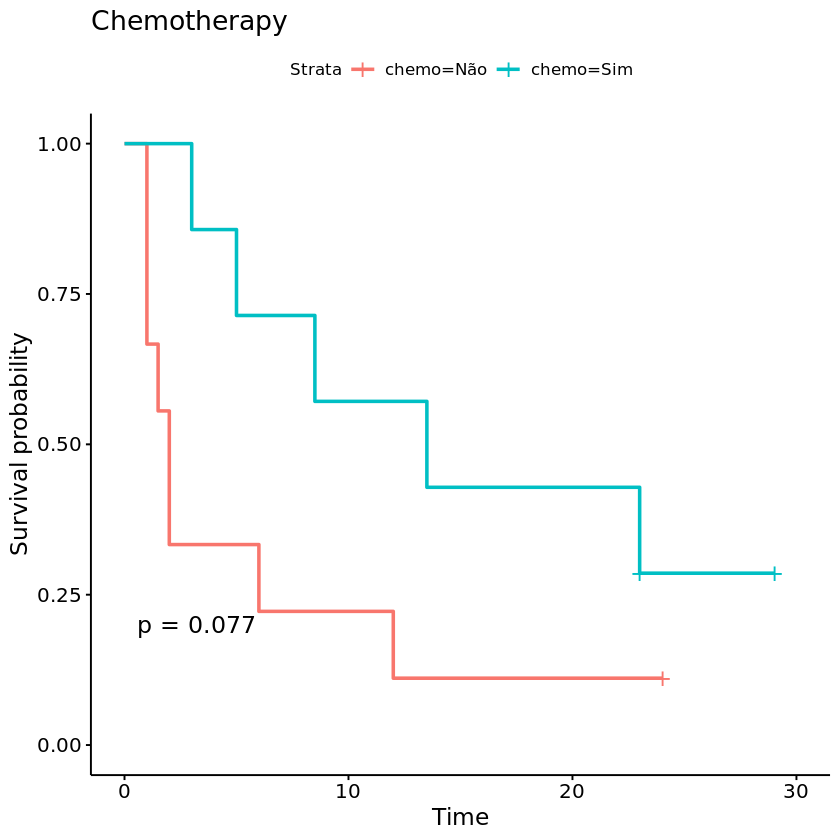

In [167]:
fit_chemo <- survfit(Surv(time, status) ~ chemo, data = cg)
ggsurvplot(fit_chemo, data = cg, title='Chemotherapy', pval=TRUE)

In [168]:
table(cg[,'Radioterapia'])


           Não           Não  Sem informação            Sim 
            11              1              0              4 

In [169]:
cg[,'Radioterapia']

[1] Não  Não  Não  Não  Não  Não  Não  Não  Não  Não  Sim  Não  Não  Sim  Sim 
[16] Sim 
Levels: Não Não  Sem informação Sim

In [170]:
cg$radio <- cg[,'Radioterapia']

cg[cg[,'Radioterapia']!='Sim', 'radio'] <- 'Não' 

table(cg$radio)


           Não           Não  Sem informação            Sim 
            12              0              0              4 

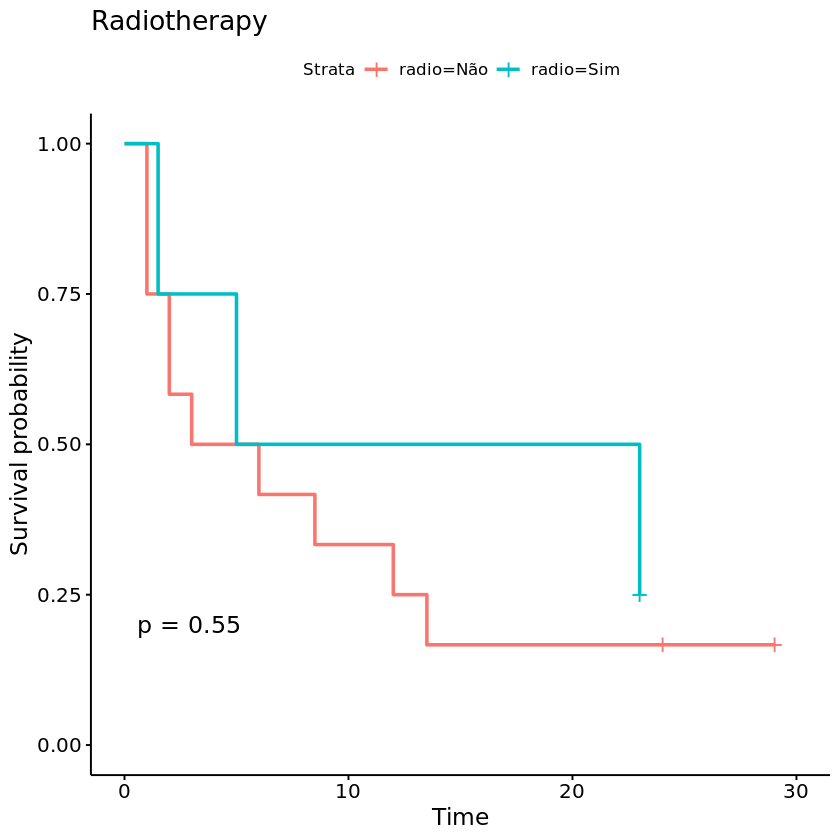

In [171]:
fit_radio <- survfit(Surv(time, status) ~ radio, data = cg)
ggsurvplot(fit_radio, data = cg, title='Radiotherapy', pval=TRUE)

In [172]:
table(cg[,'Metástase'])


           Não Sem informação            Sim 
            12              0              4 

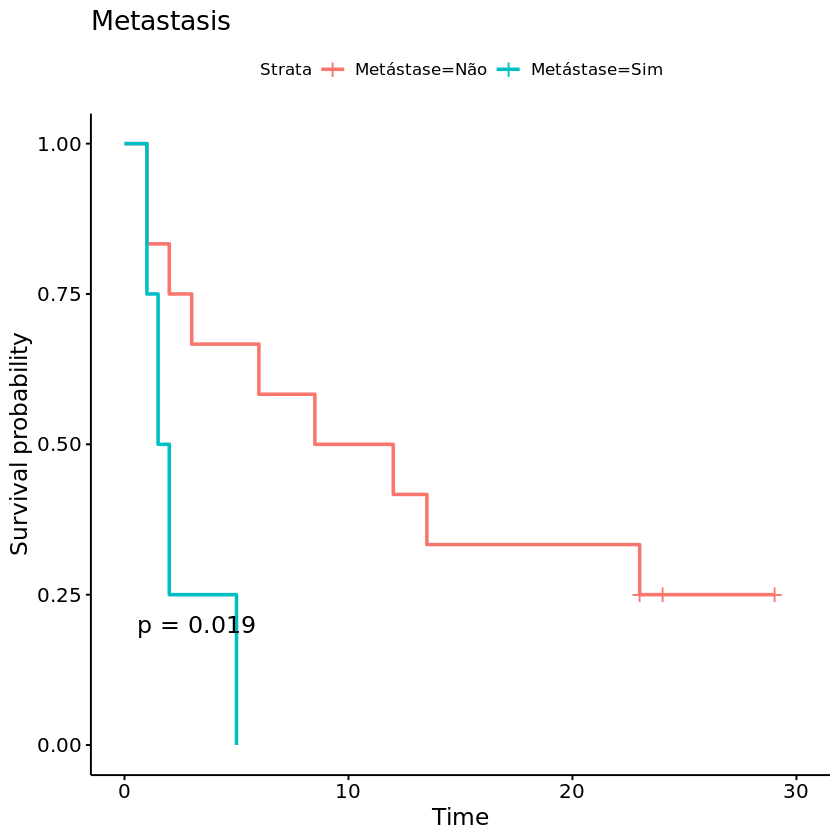

In [173]:
fit_meta <- survfit(Surv(time, status) ~ Metástase, data = cg)
ggsurvplot(fit_meta, data = cg, title='Metastasis', pval=TRUE)

In [174]:
as.numeric(cg[,'Classificação T (tamanho do turmor)'])>4

[1]  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE
[13] FALSE FALSE FALSE FALSE

In [175]:
cg[,'Classificação T (tamanho do turmor)']

[1] X 3 2 4 2 3 4 4 X X 2 4 4 2 2 4
Levels: 2 3 4 Sem informação X

In [177]:
num <- as.numeric(as.character(cg[,'Classificação T (tamanho do turmor)']))

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [178]:
cg$tumor <- '>=4'

cg[num<4 & !is.na(num), 'tumor'] <- '<4'

cg[,c('tumor', 'Classificação T (tamanho do turmor)')]

,tumor,Classificação T (tamanho do turmor)
,<chr>,<fct>
1,>=4,X
2,<4,3
3,<4,2
4,>=4,4
5,<4,2
6,<4,3
7,>=4,4
9,>=4,4
10,>=4,X


In [179]:
cg[!grepl('X|S', cg[,'Classificação T (tamanho do turmor)']),
   c('tumor', 'Classificação T (tamanho do turmor)')]

,tumor,Classificação T (tamanho do turmor)
,<chr>,<fct>
2,<4,3
3,<4,2
4,>=4,4
5,<4,2
6,<4,3
7,>=4,4
9,>=4,4
13,<4,2
14,>=4,4


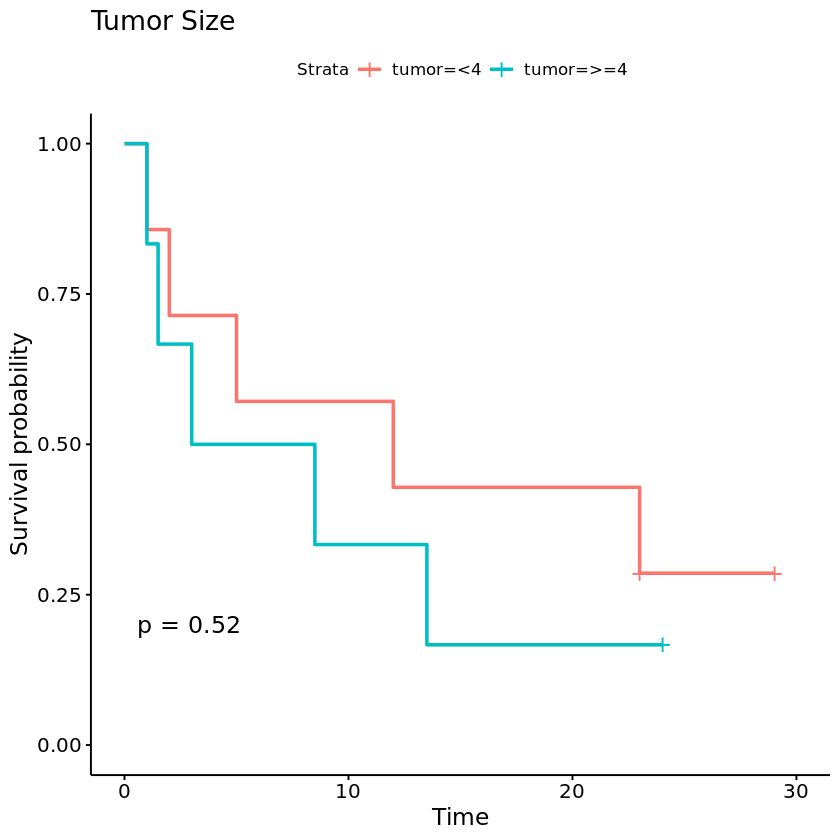

In [180]:
fit_tumor <- survfit(Surv(time, status) ~ tumor, 
                     data = cg[!grepl('X|S', cg[,'Classificação T (tamanho do turmor)']),])

ggsurvplot(fit_tumor, data = cg[!grepl('X|S', cg[,'Classificação T (tamanho do turmor)']),], 
           title='Tumor Size', pval=TRUE)

In [181]:
cg$Idade

[1] 85 70 64 68 49 78 70 57 47 72 44 40 69 56 68 52

In [184]:
cg$age <- '>=64'
cg[cg[,'Idade']<64, 'age'] <- '<64'

table(cg$age)


 <64 >=64 
   7    9 

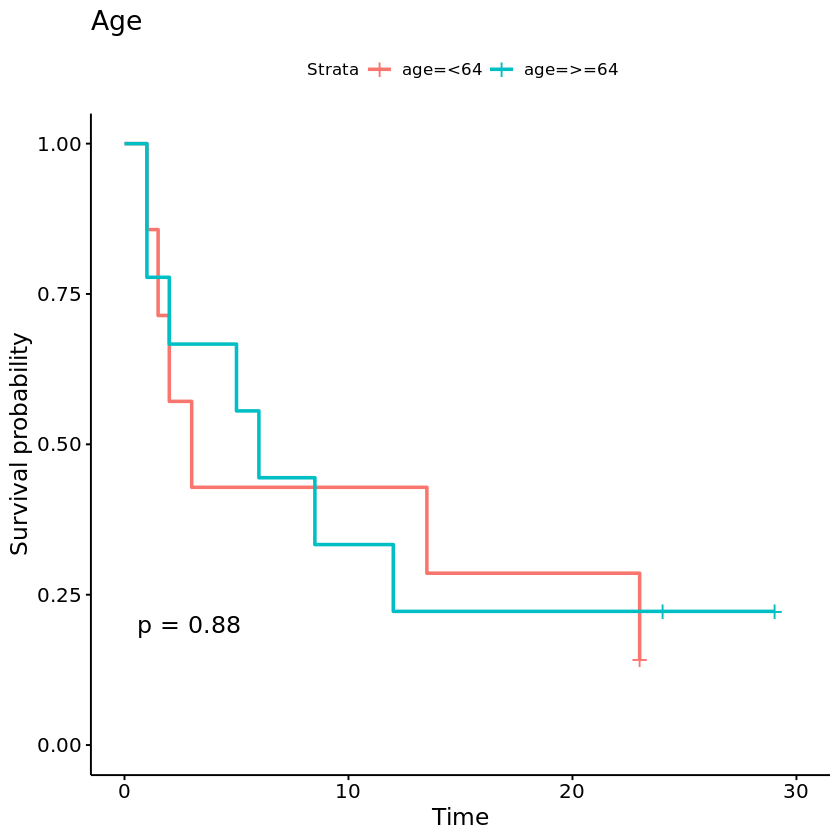

In [185]:
fit_age <- survfit(Surv(time, status) ~ age, data = cg)
ggsurvplot(fit_age, data = cg, title='Age', pval=TRUE)

In [186]:
pdf('cg_survival_curves.pdf')
ggsurvplot(fit_lymph, data = cg[!grepl('Sem|X', cg[,'Linfonodo positivo']),], title='Lymph Node', pval=TRUE)
ggsurvplot(fit_chemo, data = cg, title='Chemotherapy', pval=TRUE)
ggsurvplot(fit_radio, data = cg, title='Radiotherapy', pval=TRUE)
ggsurvplot(fit_meta, data = cg, title='Metastasis', pval=TRUE)
ggsurvplot(fit_tumor, data = cg[!grepl('X|S', cg[,'Classificação T (tamanho do turmor)']),], 
           title='Tumor Size', pval=TRUE)
ggsurvplot(fit_age, data = cg, title='Age', pval=TRUE)
dev.off()

png 
  2